In [3]:
import cv2 #importing the Open cv library
import numpy as np #importing numpy 
import matplotlib.pyplot as plt  #Library for ploting graphs
import math as m #library forperforming math functions like log and root etc

In [17]:
# Shift + tab  : Suggestions
#Q#1
path1 = r'D:\Fall 2021\DIP\Assignment02\Assignment # 2\img\Q-1a.jpg' #path of image from local directory for image a Question#1
img1 = cv2.imread(path1,cv2.IMREAD_COLOR) #Function for reading image from the path
path2 = r'D:\Fall 2021\DIP\Assignment02\Assignment # 2\img\Q-1b.jpg' #path of image from local directory for image b Question#2
img2 = cv2.imread(path2,cv2.IMREAD_COLOR) #Function for reading image from the path

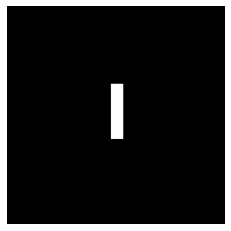

In [18]:
grayimg1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) # convert color from BGR TO RGB
grayimg2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) # convert color from BGR TO RGB
ret, img1thresh = cv2.threshold(grayimg1, 100, 255, cv2.THRESH_BINARY) #Applying the threshold function on the coverted image
ret, img2thresh = cv2.threshold(grayimg2, 100, 255, cv2.THRESH_BINARY) #Applying the threshold function on the coverted image
img_area = cv2.bitwise_and(img1thresh,img2thresh) #saving the overlapping area of the image
plt.imshow(img_area,cmap='gray') #And Function for plotting the image's region which is overlapping as output
plt.axis('off') 
plt.show() #this function will show the image as output

In [19]:
area_pixels=0 #Variable saving the value of area initially has value 0
for i in range(len(img_area)):  #A loop to calculate the area which is overlapping in the two given images
    for j in range(len(img_area[i])):
        if(img_area[i][j]==255):
            area_pixels=area_pixels+1
print("Overlapping Area : ",area_pixels) #Print the value of area which was overlapped

Overlapping Area :  1292


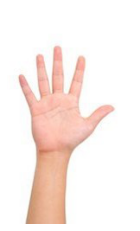

In [20]:
#Q#2
path3 = r'D:\Fall 2021\DIP\Assignment02\Assignment # 2\img\Q-2.jpg' #Q 2 image path from local directory
img3 = cv2.imread(path3,cv2.IMREAD_COLOR) #Function for reading image from the path
grayimg3 = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY) # convert color to a grayscale image
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB) # convert color from BGR TO RGB
plt.imshow(img3) #Function for plotting the image as output
plt.axis('off')
plt.show() #this function will show the image as output

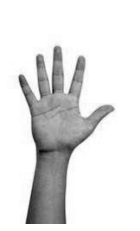

In [21]:
plt.imshow(grayimg3,cmap='gray') #Function for plotting the image as output
plt.axis('off')
plt.show() #this function will show the image as output

In [22]:
#making contours function to get shape boundry of the given hand image
def getContours(img):
    contours,hierarchy=cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    for cnt in contours: 
        cv2.drawContours(imgContour2,cnt,-1,(0,255,0),3)
        peri=cv2.arcLength(cnt,True) 
        approx=cv2.approxPolyDP(cnt,0.001*peri,True)
        x,y,w,h=cv2.boundingRect(approx) 
    cv2.rectangle(imgContour2,(x-(w//2)-5,y),(x+w,y+(h//2)+15),(0,255,0),2) 
    parameter=0
    for i in range(len(imgContour2)):
        for j in range(len(imgContour2[i])):
            if(imgContour2[i][j][1]==255):
                parameter=parameter+1
    parameter=str(parameter)
    cv2.putText(imgContour2,parameter,(w//2-20,(h//2)+10),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),1)
    plt.imshow(imgContour2) #Function for plotting the image as output
    plt.axis('off')
    plt.show() #Function for showing the image as output

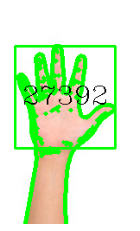

In [23]:
imgContour=img3.copy() #Copying the image to retain original image as well
imgContour2=img3.copy() #Copying the image to retain original image as well
imgBlur=cv2.GaussianBlur(grayimg3,(7,7),1) #Applying the gaussian blur function on the image to proceed for canny edge detector
imgCanny=cv2.Canny(imgBlur,50,50) #Applying the canny operation on the blurred image
getContours(imgCanny) #the above funciton called for showing the output and value of parameters

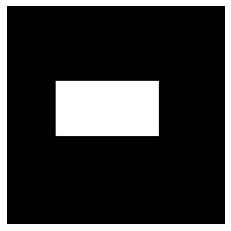

In [14]:
#Q#3
path4 = r'D:\Fall 2021\DIP\Assignment02\Assignment # 2\img\Q-3.jpg' #path of image from local directory for image of Question#3
img4 = cv2.imread(path4,cv2.IMREAD_COLOR) #Function for reading image from the path
grayimg4 = cv2.cvtColor(img4,cv2.COLOR_BGR2GRAY) # convert the image to grayscale image
img4 = cv2.cvtColor(img4,cv2.COLOR_BGR2RGB) # convert color from BGR TO RGB
plt.imshow(img4) #Function for plotting the image as output
plt.axis('off')
plt.show() #this function will show the image as output

Area :  10792


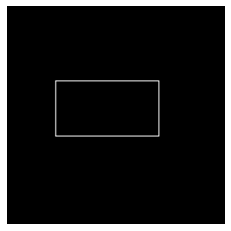

In [15]:
ret, img4thresh = cv2.threshold(grayimg4, 100, 255, cv2.THRESH_BINARY) #applying the threshold on the given image
area_pixels=0 #Variable saving the value of area initially has value 0
for i in range(len(img4thresh)): #Loop for counting the area of pixels of the boundry
    for j in range(len(img4thresh[i])):
        if(img4thresh[i][j]==255):
            area_pixels=area_pixels+1
print("Area : ",area_pixels) #printing the value of pixels area
img4y = cv2.Sobel(img4thresh,cv2.CV_64F,1,0,ksize=3) #applying the sobel operator for sharpning the image 
img4yabs = np.absolute(img4y) 
img4x = cv2.Sobel(img4thresh,cv2.CV_64F,0,1,ksize=3) #Sobel is helpful for sharpning the image for detecting the errors
img4xabs = np.absolute(img4x) #getting the absolute value after applying sobel operators
img4xy=img4yabs+img4xabs
plt.imshow(img4xy,cmap='gray') #Function for plotting the image as output
plt.axis('off')
plt.show() #this function will show the image as output

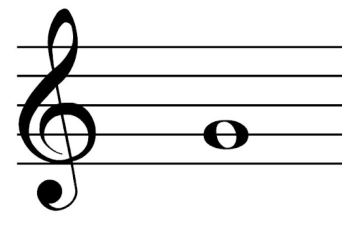

In [4]:
#Q#4
path5 = r'D:\Fall 2021\DIP\Assignment02\Assignment # 2\img\Q-4.jpg' #path of image from local directory for image of Question#4
img5 = cv2.imread(path5,cv2.IMREAD_COLOR) #read the image from the local directory in the notebook
grayimg5 = cv2.cvtColor(img5,cv2.COLOR_BGR2GRAY) #converting the given image into gray scale image
ret, threshimg5 = cv2.threshold(grayimg5, 100, 255, cv2.THRESH_BINARY) #applying the threshold operation
negimg5= cv2.bitwise_not(threshimg5) #Bitwise not operator to make the image negative white to black
plt.imshow(grayimg5,cmap='gray')  #Function for plotting the image as output
plt.axis('off')
plt.show() #Function for plotting the image as output

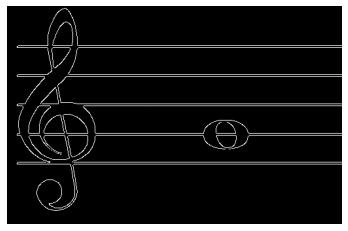

In [5]:
cannyimg5=cv2.Canny(negimg5,60,60) #applied canny edge detector to highlight the edges of the image
plt.imshow(cannyimg5,cmap='gray') #function to show the output of the image
plt.axis('off')
plt.show() #function used to show resultant image as output

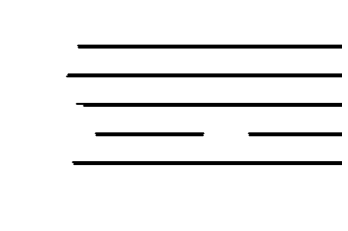

In [6]:
newimg5=np.zeros((grayimg5.shape[0],grayimg5.shape[1]),np.uint8) #applied numpy matrix function to make an image of specific size where all values are zero
theta=m.pi/2
horizontal_lines = cv2.HoughLinesP(cannyimg5, 1,theta,2, None, 25, 2) #Hough line detector used here
i =0
while (i<12):  #This is the loop to access the horizontal lines of the given image
    for j in horizontal_lines[i]:
        start_pt = (j[0],j[1])
        end_pt = (j[2],j[3])
        cv2.line(newimg5, start_pt, end_pt, (255,255,255), 2)
    i=i+1
negnewimg5 = cv2.bitwise_not(newimg5) #Applied bitwise_not operator on the image to get updated image
plt.imshow(negnewimg5,cmap='gray') #Function to show image as an output
plt.axis('off')
plt.show() #Function is used the show the image as an output

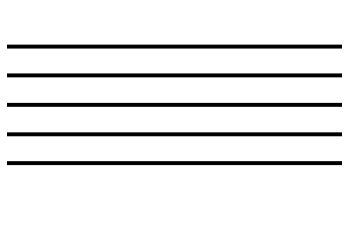

In [7]:
struct_ele = np.ones((1,350), np.uint8) #numpy function to make all matrix values one for structural element
dilatedimg5 = cv2.dilate(newimg5, struct_ele, iterations=1) #dialtated the resultant image for edge linking and reshaping
errodedimg5 = cv2.erode(dilatedimg5, struct_ele, iterations=1) #erod the image for removing pixels from the boundary of the image
negerrodedimg5 = cv2.bitwise_not(errodedimg5) 
plt.imshow(negerrodedimg5,cmap='gray') #function to show the output image
plt.axis('off')
plt.show() #function to show the image as an output